In [2]:
import pandas as pd
import numpy as np
from functions import energyoftrans,emist
make='model4'
GasPhase={'H' : 0.0000,  'He': -1.0000,  
          'C' : -4.6108, 'N' : -5.0701,  
          'O' :-4.3098, 'Na': -6.6696,  
          'Mg': -5.4597, 'Si':-5.4597} #log(number densities of elements),relative to hydrogen abundance of unity
#constants
kboltz= 1.38065e-16 #(*cgs*)
light = 2.99792e+18   #(* A s^-1 *)
eVtoErg = 1.60218e-12
hplanckerg = 6.626068e-27  #(* erg s *)
hplanckeV = 4.135667e-15  #(* eV s *) 
def n_ion(ele,Hden,frac):
    # ele : element serves as key for the GasPhase dict, string, solar abundance
    # Hden : hydrogen number density
    # frac : average probability abundance of ion across zones (OVI Frac)
    Nele_Sol=10**(GasPhase[ele])
    n_ion=frac*Hden*Nele_Sol
    return n_ion
def Emist(ne, Tgas_exponent, Ycal, Eion, gground, n_ion):
    import numpy as np
    # ne : number density of electrons
    # Tgas_exponent : power of temperature of gas in Kelvin
    # Ycal : effective collision strength
    # Eion : Energy of the photon coming from the transition (erg)
    # gground : ground degeneracy, can be found with Chianti or Stout
    # n_ion : Number density of the ion 
    Tgas=10**Tgas_exponent
    kboltz= 1.38065e-16 #(*cgs*)
    numberemis=n_ion*ne*((8.629e-6)/np.sqrt(Tgas))*(Ycal/gground)*np.exp(-Eion/(kboltz*Tgas))
    #returns emisstivity of line
    return numberemis * Eion

In [98]:
#returns ovr table with Temperature, Htot, hydrogen density, e density, and OVI density

vari='.ovr'
table=pd.read_csv('{0}{1}'.format(make, vari),delimiter='	')
ovr=table.loc[:,['#depth','Te','Htot','hden','eden','O3']]
Temp=np.log10(ovr.loc[0,"Te"])
#ovr

In [ ]:
#returns emis table with Emissivity of H 1 4861.33A, H 1 6562.81A, O 6 1031.00A, O 6 1037.62A

vari='.emis'
emis=pd.read_csv('{0}{1}'.format(make, vari),delimiter='	')
#emis.columns=['#depth','H1-4861.33A', 'H1-6562.81A', 'O6-1031.91A','O6-1037.62A']
emis.columns=['#depth','H1-4861.33A', 'H1-6562.81A','O3 2320.95A', 'O3 4958.91A', 'O3 5006.84A']

#isolates the 1031 and 1037 lines as independent tables
line4958= emis.loc[:,'O3 4958.91A'] 
line5006= emis.loc[:,'O3 5006.84A']
line2320= emis.loc[:,'O3 2320.95A']


#line4958
#line5006
emis

In [100]:
#returns eleH table with H	H+	H2 probabilites for each zone

vari='.ele_H'
eleH=pd.read_csv('{0}{1}'.format(make, vari),delimiter='	')
#print(eleH)
#returns eleO table with O	O+	O+2	O+3	O+4	O+5	O+6	O+7	O+8	O[1]	O[2]	O[3] probabilites for each zone
vari='.ele_O'
eleO=pd.read_csv('{0}{1}'.format(make,vari),delimiter='	')
#eleO

#returns table OVI_prob with OVI probabilites for each zone
OIII_prob = eleO.loc[:,['#depth', 'O+2']]
#OIII_prob

In [41]:
O3frac=np.average(OIII_prob.loc[:,'O+2'].values)
eden=np.average(ovr.loc[:,'eden'].values)
emis4958=np.average(line4958.values)
emis5006=np.average(line5006.values)
emis2320=np.average(line2320.values)
hden=np.average(ovr.loc[:,'hden'].values)

In [42]:
#number of OIII
Noxy_Sol=10**(GasPhase['O'])
Zsol=10**-1 #metallicity
nOIII=O3frac*Zsol*Noxy_Sol
print('nOIII is',nOIII)
length=ovr.loc[:,"#depth"].max() -  ovr.loc[:,"#depth"].min()
#N_OIII=nOIII*length
#print('Column density of OVI is',N_OIII)
O3frac
#pd.read_csv('model4.out',skiprows=51,skipfooter=976,delimiter='  ')

nOIII is 7.791070322412448e-16


1.5900000000000002e-10

In [43]:
SimnDat=[hden, 
         eden,
         O3frac,
         emis2320,
         emis4958,
         emis5006]
SimuDatKeyset=['H Density Log /cm^3',
               'e Density Log /cm^3',
               'OIII Probability',
               'OIII 2321 Emis',
               'OIII 4958 Emis', 
               'OIII 5006 Emis']
matrix={SimuDatKeyset[0]:[SimnDat[0]],
        SimuDatKeyset[1]:[SimnDat[1]],
        SimuDatKeyset[2]:[SimnDat[2]],
        SimuDatKeyset[3]:[SimnDat[3]],
        SimuDatKeyset[4]:[SimnDat[4]],
        SimuDatKeyset[5]:[SimnDat[5]]}

In [44]:
location=location+1
meta.insert(location,f"Temp:1e{Temp:1.1f} K , hden: {np.log10(hden):1.1f}",SimnDat)

In [55]:
meta #3.0 [factor=-2] on

,"Temp:1e4.0 K , hden: -2.5","Temp:1e4.5 K , hden: -2.5","Temp:1e5.0 K , hden: -2.5","Temp:1e5.5 K , hden: -2.5","Temp:1e6.0 K , hden: -2.5"
H Density Log /cm^3,3.162300e-03,3.162300e-03,3.162300e-03,3.162300e-03,3.162300e-03
e Density Log /cm^3,3.211145e-03,3.470518e-03,3.779224e-03,3.796200e-03,3.796791e-03
OIII Probability,4.389091e-02,2.790303e-01,4.590000e-01,4.190000e-04,1.590000e-10
OIII 2321 Emis,1.245439e-34,3.868945e-32,1.500309e-31,1.207400e-34,3.003288e-41
OIII 4958 Emis,2.546097e-32,8.530082e-31,1.707718e-30,1.165600e-33,2.801112e-40
OIII 5006 Emis,7.596476e-32,2.545012e-30,5.095142e-30,3.477700e-33,8.357403e-40


## Run once per line

In [8]:
meta=pd.DataFrame(data=matrix,index={f"Temp:1e{Temp:1.1f} K , hden: {np.log10(hden):1.1f}"}).transpose()
#meta.rename(index={'Temp'})

In [9]:
location=0

In [15]:
meta=pd.read_csv('./DataTables/O/OIIITemp(3-6).csv').set_index(np.array(SimuDatKeyset))
doublet4958=meta.loc['OIII 4958 Emis'].values
doublet5006=meta.loc['OIII 5006 Emis'].values
doublet4958/doublet5006

array([0.33516818, 0.33516861, 0.33516594, 0.33516405, 0.33516538])

array([1.63668019, 1.66806038, 1.67810834, 1.68129836, 1.6823084 ])

In [85]:
meta.to_csv('./OIII-DataTables/OIIITemp(3-7)hden(const).csv',index=False)

In [3]:
SimuDatKeyset=['H Density Log /cm^3',
               'e Density Log /cm^3',
               'OIII Probability',
               'OIII 2321 Emis',
               'OIII 4958 Emis', 
               'OIII 5006 Emis']
meta=pd.read_csv('./OIII-DataTables/OIIITemp(3-7)hden(const).csv').set_index(np.array(SimuDatKeyset))

In [15]:
cloudy=meta.loc['OIII 4958 Emis'].values 

array([1.09466943, 1.01819475, 0.99236085, 0.95673451, 0.9324502 ])

In [53]:
OIIIfracs=meta.loc['OIII Probability'].values
edens=meta.loc['e Density Log /cm^3'].values
Temperature=np.arange(4,6.5,step=.5)
#####
OIII_2321_calcEMIS={'T4.0':[],
                    'T4.5':[],
                    'T5.0':[],
                    'T5.5':[],
                    'T6.0':[]}
OIII_2321=[]
for i in range(0,len(OIIIfracs)):
    gOIIIground2320 = 3    
    YcalOIII=.0229 #different for differnt lines 
    EOIII2P3P = energyoftrans(2321)
    hDen=3.162300e-03
    
    nOIII=n_ion('O',hDen,OIIIfracs[i])
    calc=Emist(edens[i],Temperature[i],YcalOIII,EOIII2P3P,gOIIIground2320,nOIII)
    OIII_2321_calcEMIS[f"T{Temperature[i]}"].append(calc)
    OIII_2321.append(calc)
#####
OIII_4958_calcEMIS={'T4.0':[],
                    'T4.5':[],
                    'T5.0':[],
                    'T5.5':[],
                    'T6.0':[]}
OIII_4958=[]
for i in range(0,len(OIIIfracs)):
    gOIIIground4958 =9/3 #we changed these, check
    YcalOIII=2.29 #different for differnt lines 
    EOIII3P1D = energyoftrans(4958.91)
    hDen=3.162300e-03
    
    nOIII=n_ion('O',hDen,OIIIfracs[i])
    calc=Emist(edens[i],Temperature[i],YcalOIII,EOIII3P1D,gOIIIground4958,nOIII)
    OIII_4958_calcEMIS[f"T{Temperature[i]}"].append(calc)  
    OIII_4958.append(calc)
#####
OIII_5006_calcEMIS={'T4.0':[],
                    'T4.5':[],
                    'T5.0':[],
                    'T5.5':[],
                    'T6.0':[]}
OIII_5006=[]
for i in range(0,len(OIIIfracs)):
    gOIIIground5006 = 5 #we changed these
    YcalOIII=2.29 #different for differnt lines 
    EOIII3P1D = energyoftrans(5006.84)
    hDen=3.162300e-03
    
    nOIII=n_ion('O',hDen,OIIIfracs[i])
    calc=Emist(edens[i],Temperature[i],YcalOIII,EOIII3P1D,gOIIIground5006,nOIII)
    OIII_5006_calcEMIS[f"T{Temperature[i]}"].append(calc)
    OIII_5006.append(calc)

In [31]:
OIII_2321_calcEMIS

{'T4.0': [2.5012043447139296e-34],
 'T4.5': [6.698649600221744e-32],
 'T5.0': [2.577967905434809e-31],
 'T5.5': [2.030990824473657e-34],
 'T6.0': [4.956449871560243e-41]}

In [32]:
OIII_4958_calcEMIS

{'T4.0': [3.1662439259372188e-31],
 'T4.5': [8.895040811186836e-30],
 'T5.0': [1.6779424006212962e-29],
 'T5.5': [1.0550767491342436e-32],
 'T6.0': [2.397621890803888e-39]}

In [33]:
OIII_5006_calcEMIS

{'T4.0': [5.373757244912524e-31],
 'T4.5': [1.4812681236960112e-29],
 'T5.0': [2.7775031004276916e-29],
 'T5.5': [1.743158035356604e-32],
 'T6.0': [3.958882226055629e-39]}

In [57]:
OIII_5006_calcEMIS={'T4.0':[],
                    'T4.5':[],
                    'T5.0':[],
                    'T5.5':[],
                    'T6.0':[]}
OIII_5006=[]
for i in range(0,len(OIIIfracs)):
    gOIIIground5006 = 9 #we changed these
    YcalOIII=2.29 #different for differnt lines 
    EOIII3P1D = energyoftrans(5006.84)
    hDen=3.162300e-03
    
    nOIII=n_ion('O',hDen,OIIIfracs[i])
    calc=Emist(edens[i],Temperature[i],YcalOIII,EOIII3P1D,gOIIIground5006,nOIII)
    OIII_5006_calcEMIS[f"T{Temperature[i]}"].append(calc)
    OIII_5006.append(calc)
    
    
OIII_5006=(np.multiply(OIII_5006,.75))

OIII_4958=(np.multiply(OIII_5006,.25))

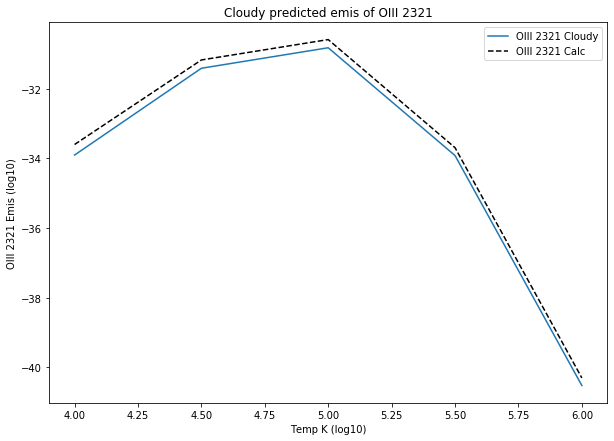

In [35]:
emis2321_vals=meta.loc['OIII 2321 Emis',:].values
emis4958_vals=meta.loc['OIII 4958 Emis',:].values
emis5006_vals=meta.loc['OIII 5006 Emis',:].values
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(Temperature,np.log10(emis2321_vals),label='OIII 2321 Cloudy')
plt.plot(Temperature,np.log10(OIII_2321),'--k',label='OIII 2321 Calc')
plt.ylabel('OIII 2321 Emis (log10)')
plt.xlabel('Temp K (log10)')
plt.title("Cloudy predicted emis of OIII 2321")
plt.legend()

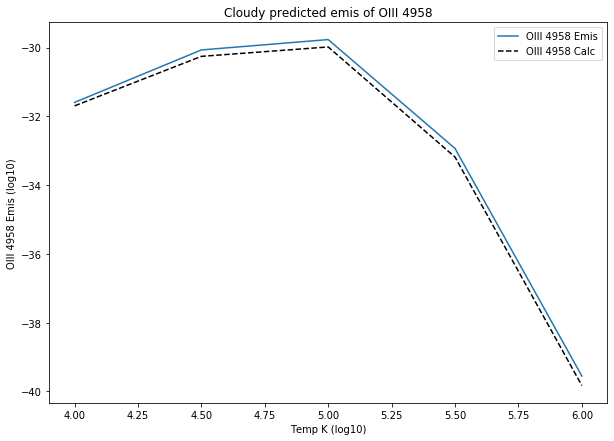

In [58]:
plt.figure(figsize=(10,7))
plt.plot(Temperature,np.log10(emis4958_vals),label='OIII 4958 Emis')
plt.plot(Temperature,np.log10(OIII_4958),'--k',label='OIII 4958 Calc')
plt.ylabel('OIII 4958 Emis (log10)')
plt.xlabel('Temp K (log10)')
plt.title("Cloudy predicted emis of OIII 4958")
plt.legend()

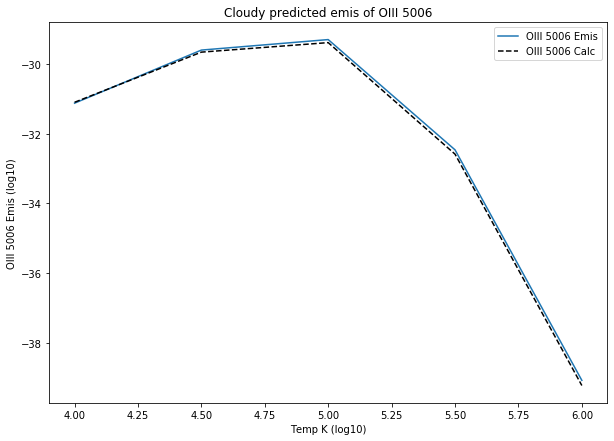

In [59]:
plt.figure(figsize=(10,7))
plt.plot(Temperature,np.log10(emis5006_vals),label='OIII 5006 Emis')
plt.plot(Temperature,np.log10(OIII_5006),'--k',label='OIII 5006 Calc')
plt.ylabel('OIII 5006 Emis (log10)')
plt.xlabel('Temp K (log10)')
plt.title("Cloudy predicted emis of OIII 5006")
plt.legend()

In [56]:
print(np.log10(emis5006_vals)-np.log10(OIII_5006))
np.log10(emis4958_vals)-np.log10(OIII_4958)

#4958; [-0.85267688, -0.76795426, -0.73951213, -0.703061  , -0.67851587]
#5006; [-0.97999966, -0.89527759, -0.86683199, -0.83037842, -0.805835  ]

[-0.40596839 -0.32124632 -0.29280072 -0.25634715 -0.23180374]


array([-1.09466943, -1.01819475, -0.99236085, -0.95673451, -0.9324502 ])

In [ ]:
import pyatomdb, numpy, pylab

# We will get some maxwellian rates for a O 6+ 7->1

Z = 8
z1 = 7
up = 7
lo = 1

# excitation

Te = numpy.logspace(4, 7, 15)

#  >>> # (1) Get excitation rates for row 12 of an Fe XVII file
#  >>> colldata = pyatomdb.atomdb.get_data(26,17,'EC')
#  >>> exc, dex = get_maxwell_rate(Te, colldata=colldata, index=12)

#  >>> # (2) Get excitation rates for row 12 of an Fe XVII file
#  >>> exc, dex = get_maxwell_rate(Te, Z=26,z1=17, index=12)

#  >>>  (3) Get excitation rates for transitions from level 1 to 15 of FE XVII
#  >>> exc, dex = get_maxwell_rate(Te, Z=26, z1=17, dtype='EC', finallev=15, initlev=1)

datacache = {}

# get data by specifying ion, upper and lower levels
exc, dexc = pyatomdb.atomdb.get_maxwell_rate(Te, Z=Z, z1=z1, initlev = lo, finallev=up, dtype='EC', datacache=datacache)

fig= pylab.figure()
fig.show()
ax = fig.add_subplot(111)
ax.loglog(Te, exc, label='excitation')
ax.loglog(Te, dexc, label = 'deexcitation')


# preload data and find a specific transition
ecdat = pyatomdb.atomdb.get_data(8,7,'EC', datacache=datacache)

i = numpy.where( (ecdat[1].data['Upper_Lev']==up) &\
                 (ecdat[1].data['Lower_Lev']==lo))[0][0]

exc, dex = pyatomdb.atomdb.get_maxwell_rate(Te,colldata=ecdat, index=i, datacache=datacache)

ax.loglog(Te, exc, 'o', label='excitation')
ax.loglog(Te, dexc, 'o', label = 'deexcitation')

ax.legend(loc=0)
ax.set_xlabel("Temperature (K)")
ax.set_ylabel("Rate Coefficient (cm$^3$ s$^{-1}$)")

pylab.draw()
zzz=input("Press enter to continue")
# save image files
fig.savefig('atomdb_examples_2_1.pdf')
fig.savefig('atomdb_examples_2_1.svg')

# you can also obtain ionization or recombination rates (see get_maxwell_rates writeup for options)
# in most cases you need to specify initlev and finallev as 1 to get the ion to ion rates.

ion= pyatomdb.atomdb.get_maxwell_rate(Te,Z=Z, z1=z1, initlev=1, finallev=1, dtype='CI', datacache=datacache)
print(ion)
#
# However it is recommended that you use get_ionrec_rate instead - it gives you everythign in one go

# combining the different types
ion, rec = pyatomdb.atomdb.get_ionrec_rate(Te, Z=Z, z1=z1, datacache=datacache)

# as separate entities
CI, EA, RR, DR=pyatomdb.atomdb.get_ionrec_rate(Te, Z=Z, z1=z1, datacache=datacache, separate=True)

print("Collisional ionization: ",CI)
print("Excitation Autoionization: ",EA)
print("Radiative Recombination: ",RR)
print("Dielectroni Recombination: ",DR)
ax.cla()

ax.loglog(Te, ion, label='Ionization')
ax.loglog(Te, rec, label='Recombination')

ax.loglog(Te, CI, '--',label='CI')
ax.loglog(Te, EA, '--',label='EA')
ax.loglog(Te, RR, '--',label='RR')
ax.loglog(Te, DR, '--',label='DR')

ax.legend(loc=0)
ax.set_xlabel("Temperature (K)")
ax.set_ylabel("Rate Coefficient (cm$^3$ s$^{-1}$)")

pylab.draw()
zzz=input("Press enter to continue")
# save image files
fig.savefig('atomdb_examples_2_2.pdf')
fig.savefig('atomdb_examples_2_2.svg')


#get_maxwell_rate(Te, colldata=False, index=-1, lvdata=False, Te_unit='K', \
#                     lvdatap1=False, ionpot = False, \
#                     force_extrap=False, silent=True,\
#                     finallev=False, initlev=False,\
#                     Z=-1, z1=-1, dtype=False, exconly=False,\
#                     datacache=False, settings=False, ladat=False):


In [24]:
doublet4958/doublet5006
#cloudy ratio

array([0.33516818, 0.33516861, 0.33516594, 0.33516405, 0.33516538])

In [25]:
np.array(OIII_4958)/np.array(OIII_5006)
#mathematica ratio

array([1.63668019, 1.66806038, 1.67810834, 1.68129836, 1.6823084 ])